In [28]:
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import numpy as np
from pandas_datareader import data
import pypfopt
from pypfopt import risk_models
from pypfopt import plotting
from pypfopt import expected_returns

In [29]:
# Tickers of individual Asset Classes
tickers = ['SPY', 'IWM', 'VWO', 'BIZD', 'USRT', 'GLD', 'VGLT', 'STIP', 'UUP', 'DBO', 'SHY']

In [30]:
# Assign initial weights to individual asset classes
weights = [.2,.1,.1,.1,.1,.1,.05,.05,.05,.05,.05]

In [31]:
date_start = '01/01/2020'
date_end = '06/30/2020'

In [32]:
# Pull data from Yahoo Finance
port_df = pd.DataFrame()
port_df = data.DataReader(tickers, 'yahoo', date_start, date_end)

In [33]:
port_df.head(-1)

Attributes  Adj Close                                                        \
Symbols          BIZD    DBO         GLD         IWM        SHY         SPY   
Date                                                                          
2020-01-02  15.618997  10.69  143.949997  164.584885  84.063400  321.555786   
2020-01-03  15.600368  11.01  145.860001  163.939590  84.132904  319.120911   
2020-01-06  15.637625  10.99  147.389999  164.157990  84.103127  320.338379   
2020-01-07  15.628310  10.96  147.970001  163.611954  84.103127  319.437653   
2020-01-08  15.637625  10.56  146.860001  164.118271  84.063400  321.140106   
2020-01-09  15.656250  10.46  146.029999  164.316833  84.073341  323.317627   
2020-01-10  15.646936  10.38  146.910004  163.701309  84.093185  322.387207   
2020-01-13  15.684193  10.21  145.820007  164.763596  84.083267  324.604401   
2020-01-14  15.712134  10.26  145.690002  165.369202  84.093185  324.109497   
2020-01-15  15.768014  10.18  146.539993  166.163422  84.132904  324.841919   
2020-01-16  15.851838  10.27  146.309998  168.307861  84.132904  327.544098   
2020-01-17  15.870466  10.32  146.580002  167.851181  84.162689  328.563599   
2020-01-21  15.833210  10.23  146.740005  166.461273  84.182549  327.920227   
2020-01-22  15.898406   9.96  146.789993  166.352051  84.202400  327.959808   
2020-01-23  15.861152   9.76  147.119995  166.242844  84.232185  328.335938   
2020-01-24  15.749387   9.56  147.979996  164.197693  84.261986  325.416016   
2020-01-27  15.684193   9.30  148.990005  162.331238  84.351334  320.199799   
2020-01-28  15.749387   9.41  147.660004  163.681442  84.311607  323.555206   
2020-01-29  15.721446   9.33  148.460007  162.748230  84.391052  323.287933   
2020-01-30  15.730761   9.27  148.470001  162.748230  84.400978  324.337128   
2020-01-31  15.665565   9.08  149.330002  159.372742  84.510193  318.447845   
2020-02-03  15.665565   8.79  148.360001  161.149841  84.485313  320.813446   
2020-02-04  15.777328   8.75  146.429993  163.582169  84.395836  325.703064   
2020-02-05  15.851838   8.96  146.610001  166.103851  84.336159  329.464294   
2020-02-06  15.889092   9.01  147.399994  165.726593  84.356041  330.572876   
2020-02-07  15.907721   8.95  147.789993  163.691391  84.405777  328.811035   
2020-02-10  15.851838   8.87  148.169998  164.614670  84.445557  331.265717   
2020-02-11  15.889092   8.92  147.660004  165.756378  84.405777  331.839813   
2020-02-12  15.870466   9.07  147.539993  166.898087  84.365990  333.977783   
2020-02-13  15.944974   9.06  148.380005  167.334915  84.385880  333.621429   
...               ...    ...         ...         ...        ...         ...   
2020-05-18  10.728905   6.16  162.690002  132.232834  86.429176  293.707520   
2020-05-19  10.912885   6.13  164.259995  129.621674  86.479080  290.690796   
2020-05-20  11.058131   6.31  164.649994  133.548386  86.479080  295.629059   
2020-05-21  11.280843   6.37  162.250000  133.787582  86.459114  293.588043   
2020-05-22  11.367991   6.30  163.210007  134.435394  86.459114  294.145599   
2020-05-26  11.842464   6.45  160.889999  138.312286  86.459114  297.769623   
2020-05-27  12.007077   6.26  161.179993  142.607758  86.439163  302.200134   
2020-05-28  11.726267   6.31  161.720001  139.229172  86.479080  301.642609   
2020-05-29  11.648802   6.50  162.910004  138.431870  86.479080  302.986694   
2020-06-01  11.890881   6.61  163.660004  139.757385  86.469086  304.211273   
2020-06-02  11.987712   6.73  162.600006  140.913483  86.469086  306.730194   
2020-06-03  12.287889   6.75  159.600006  144.311996  86.399185  310.812225   
2020-06-04  12.326621   6.81  161.279999  144.102692  86.419151  309.995819   
2020-06-05  12.345987   7.06  158.009995  149.673859  86.389191  317.940887   
2020-06-08  13.014123   6.89  159.720001  152.574051  86.369217  321.783966   
2020-06-09  12.820460   6.95  161.259995  149.753586  86.399185  319.384521   
2020-06-10  12.345987   6.99  163.570007  145.6873

In [34]:
# Daily adjusted close prices of individual asset classes
adj_close = pd.DataFrame()
adj_close = port_df["Adj Close"]
adj_close.fillna(0).head(-1)

Symbols,BIZD,DBO,GLD,IWM,SHY,SPY,STIP,USRT,UUP,VGLT,VWO
Date,,,,,,,,,,,
2020-01-02,15.618997,10.69,143.949997,164.584885,84.063400,321.555786,100.351089,52.611206,26.059999,83.087746,45.251080
2020-01-03,15.600368,11.01,145.860001,163.939590,84.132904,319.120911,100.490372,53.160263,26.090000,84.324020,44.446045
2020-01-06,15.637625,10.99,147.389999,164.157990,84.103127,320.338379,100.450569,53.287724,26.030001,83.918518,44.366531
2020-01-07,15.628310,10.96,147.970001,163.611954,84.103127,319.437653,100.341141,52.709251,26.120001,83.473457,44.346653
2020-01-08,15.637625,10.56,146.860001,164.118271,84.063400,321.140106,100.251595,52.905346,26.190001,82.998726,44.545429
2020-01-09,15.656250,10.46,146.029999,164.316833,84.073341,323.317627,100.251595,52.777885,26.240000,83.245987,44.774021
2020-01-10,15.646936,10.38,146.910004,163.701309,84.093185,322.387207,100.291389,53.199478,26.219999,83.948174,44.992672
2020-01-13,15.684193,10.21,145.820007,164.763596,84.083267,324.604401,100.331192,53.768147,26.219999,83.671265,45.608871
2020-01-14,15.712134,10.26,145.690002,165.369202,84.093185,324.109497,100.341141,53.542641,26.230000,84.106438,45.400162


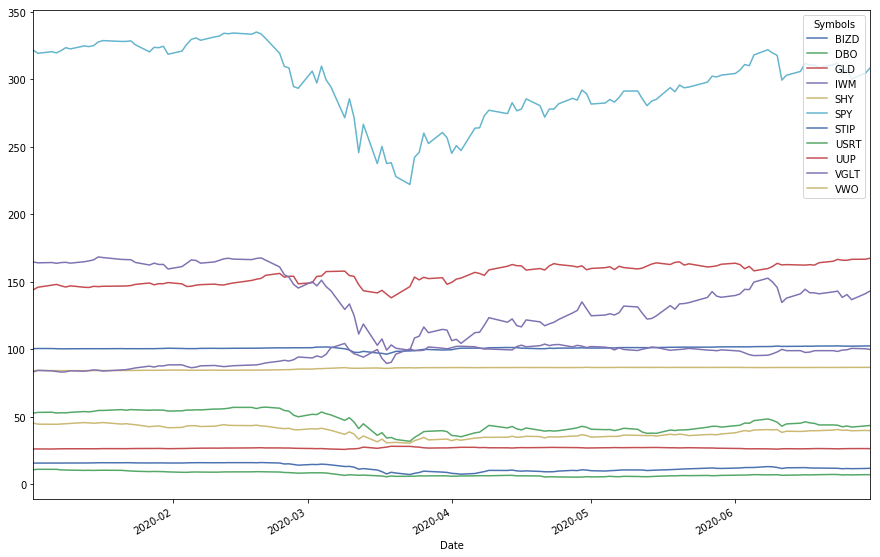

In [35]:
# Plot of indiviudal asset class pricess since 2010
adj_close[adj_close.index >= date_start].plot(figsize=(15,10));

In [36]:
# Daily Returns of individual asset classes
dly_rtn = adj_close.pct_change().fillna(0)
dly_rtn.head(-1)

Symbols,BIZD,DBO,GLD,IWM,SHY,SPY,STIP,USRT,UUP,VGLT,VWO
Date,,,,,,,,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,-0.001193,0.029935,0.013269,-0.003921,0.000827,-0.007572,0.001388,0.010436,0.001151,0.014879,-0.017790
2020-01-06,0.002388,-0.001817,0.010490,0.001332,-0.000354,0.003815,-0.000396,0.002398,-0.002300,-0.004809,-0.001789
2020-01-07,-0.000596,-0.002730,0.003935,-0.003326,0.000000,-0.002812,-0.001089,-0.010856,0.003458,-0.005303,-0.000448
2020-01-08,0.000596,-0.036496,-0.007502,0.003095,-0.000472,0.005330,-0.000892,0.003720,0.002680,-0.005687,0.004482
2020-01-09,0.001191,-0.009470,-0.005652,0.001210,0.000118,0.006781,0.000000,-0.002409,0.001909,0.002979,0.005132
2020-01-10,-0.000595,-0.007648,0.006026,-0.003746,0.000236,-0.002878,0.000397,0.007988,-0.000762,0.008435,0.004883
2020-01-13,0.002381,-0.016378,-0.007419,0.006489,-0.000118,0.006877,0.000397,0.010689,0.000000,-0.003299,0.013696
2020-01-14,0.001782,0.004897,-0.000892,0.003676,0.000118,-0.001525,0.000099,-0.004194,0.000381,0.005201,-0.004576


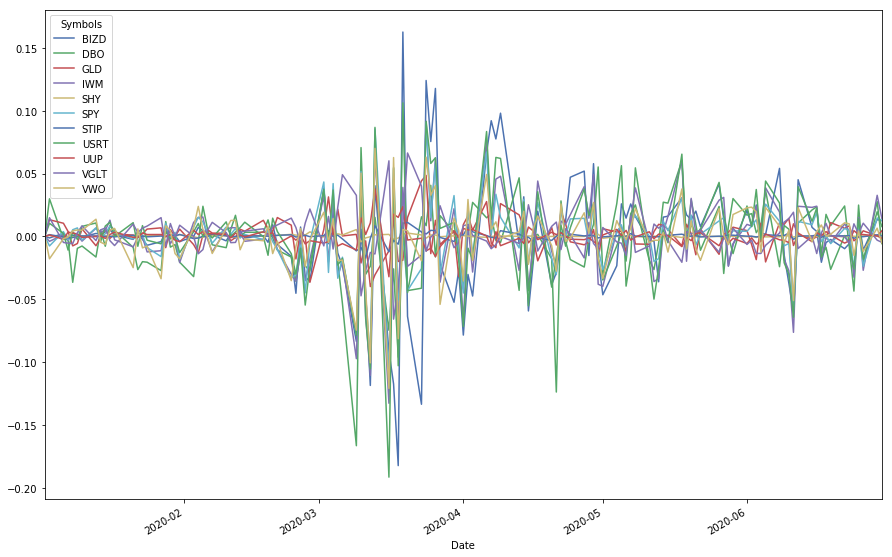

In [37]:
# Plot of indiviudal asset class pricess since 2010
dly_rtn[dly_rtn.index >= date_start].plot(figsize=(15,10));

In [38]:
# Correlation matrix of asset classes
correlation = dly_rtn.corr()
correlation

Symbols,BIZD,DBO,GLD,IWM,SHY,SPY,STIP,USRT,UUP,VGLT,VWO
Symbols,,,,,,,,,,,
BIZD,1.000000,0.488198,0.083522,0.724068,-0.070420,0.637009,0.391764,0.724811,-0.122061,-0.167997,0.578396
DBO,0.488198,1.000000,0.033273,0.548579,-0.314275,0.531187,0.393406,0.503093,0.124635,-0.328331,0.534736
GLD,0.083522,0.033273,1.000000,0.148349,0.091513,0.144338,0.223431,0.123264,-0.262937,0.231161,0.148118
IWM,0.724068,0.548579,0.148349,1.000000,-0.333167,0.936622,0.422829,0.926935,0.128924,-0.439066,0.870531
SHY,-0.070420,-0.314275,0.091513,-0.333167,1.000000,-0.397317,0.210003,-0.275804,-0.265867,0.655152,-0.317885
SPY,0.637009,0.531187,0.144338,0.936622,-0.397317,1.000000,0.341701,0.898711,0.202586,-0.516824,0.901882
STIP,0.391764,0.393406,0.223431,0.422829,0.210003,0.341701,1.000000,0.415169,0.168926,0.176892,0.423427
USRT,0.724811,0.503093,0.123264,0.926935,-0.275804,0.898711,0.415169,1.000000,0.124293,-0.438552,0.828576
UUP,-0.122061,0.124635,-0.262937,0.128924,-0.265867,0.202586,0.168926,0.124293,1.000000,-0.381698,0.191173


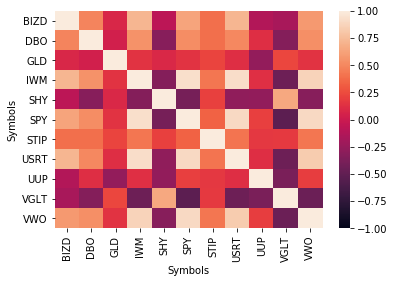

In [39]:
# Correlation matrix - visual
sns.heatmap(correlation,vmin=-1,vmax=1);

In [40]:
# Correlation coefficients - summed values
correlation.sum().sort_values(axis=0,ascending=True)

Symbols
VGLT   -0.661396
SHY    -0.018067
UUP     0.907972
GLD     1.964031
DBO     3.514500
STIP    4.167548
BIZD    4.267289
SPY     4.679896
VWO     4.706822
USRT    4.830496
IWM     4.934606
dtype: float64

In [41]:
# Daily portfolio returns given defined weights
port_dly_rtn = dly_rtn.dot(weights)
port_dly_rtn.head(-1)

Date
2020-01-02    0.000000
2020-01-03    0.003518
2020-01-06    0.001479
2020-01-07   -0.001324
2020-01-08   -0.003270
2020-01-09   -0.000083
2020-01-10    0.000127
2020-01-13    0.000496
2020-01-14    0.000829
2020-01-15    0.001622
2020-01-16    0.004641
2020-01-17    0.001093
2020-01-21   -0.002430
2020-01-22   -0.001827
2020-01-23   -0.001713
2020-01-24   -0.005018
2020-01-27   -0.006637
2020-01-28    0.003167
2020-01-29   -0.000426
2020-01-30   -0.001023
2020-01-31   -0.007275
2020-02-03   -0.001297
2020-02-04    0.003628
2020-02-05    0.006032
2020-02-06    0.002183
2020-02-07   -0.001842
2020-02-10    0.001165
2020-02-11    0.001821
2020-02-12    0.003361
2020-02-13    0.001649
                ...   
2020-05-18    0.024264
2020-05-19    0.000203
2020-05-20    0.011633
2020-05-21    0.002864
2020-05-22    0.001426
2020-05-26    0.015690
2020-05-27    0.005380
2020-05-28   -0.006752
2020-05-29    0.002788
2020-06-01    0.009416
2020-06-02    0.005813
2020-06-03    0.008964
2020-0

In [42]:
# Cumulative portfolio returns
cum_ret = (1 + port_dly_rtn).cumprod()
cum_ret.head(-1)

Date
2020-01-02    1.000000
2020-01-03    1.003518
2020-01-06    1.005003
2020-01-07    1.003672
2020-01-08    1.000390
2020-01-09    1.000307
2020-01-10    1.000434
2020-01-13    1.000930
2020-01-14    1.001760
2020-01-15    1.003385
2020-01-16    1.008042
2020-01-17    1.009144
2020-01-21    1.006691
2020-01-22    1.004853
2020-01-23    1.003132
2020-01-24    0.998098
2020-01-27    0.991473
2020-01-28    0.994614
2020-01-29    0.994190
2020-01-30    0.993173
2020-01-31    0.985948
2020-02-03    0.984668
2020-02-04    0.988241
2020-02-05    0.994202
2020-02-06    0.996372
2020-02-07    0.994537
2020-02-10    0.995696
2020-02-11    0.997508
2020-02-12    1.000861
2020-02-13    1.002512
                ...   
2020-05-18    0.878199
2020-05-19    0.878377
2020-05-20    0.888595
2020-05-21    0.891140
2020-05-22    0.892410
2020-05-26    0.906412
2020-05-27    0.911289
2020-05-28    0.905135
2020-05-29    0.907659
2020-06-01    0.916206
2020-06-02    0.921531
2020-06-03    0.929792
2020-0

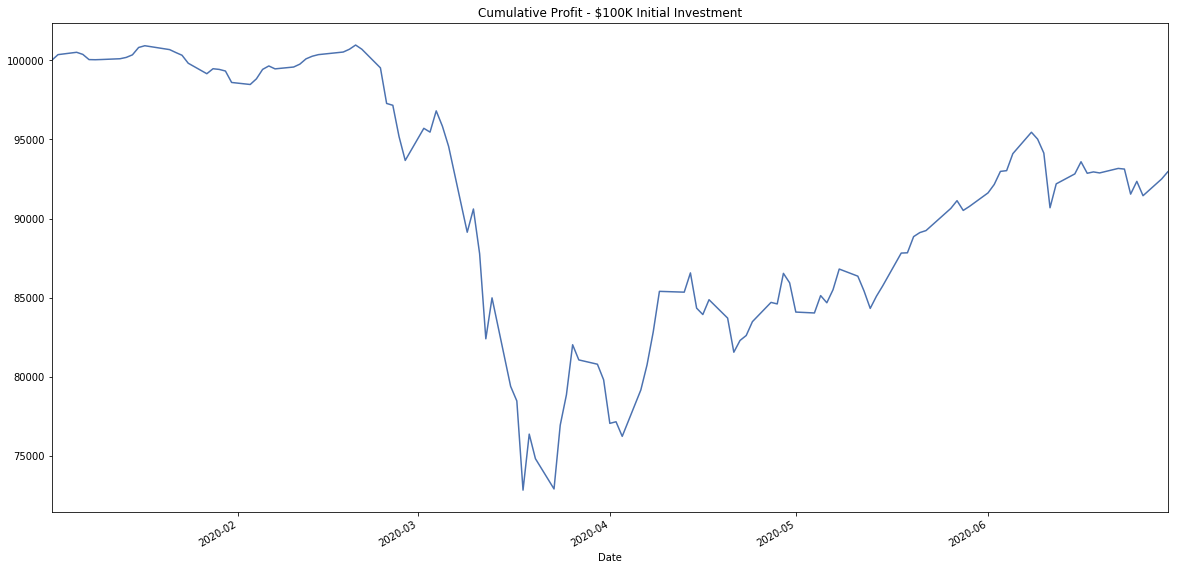

In [43]:
# Theoretical returns of the portfolio given an initial investment of $100K
ini_inv = 100000
cum_pft = ini_inv * cum_ret
cum_pft.plot(kind='line',figsize=(20,10),title='Cumulative Profit - $100K Initial Investment');

In [44]:
# Calculate the riskiness (i.e. covariance) within the asset class portfolio
sample_cov = risk_models.sample_cov(adj_close, frequency=252)
sample_cov

Symbols,BIZD,DBO,GLD,IWM,SHY,SPY,STIP,USRT,UUP,VGLT,VWO
Symbols,,,,,,,,,,,
BIZD,0.519053,0.188992,0.012605,0.278451,-0.000839,0.205459,0.014661,0.308579,-0.009807,-0.031202,0.177759
DBO,0.188992,0.288729,0.003752,0.157345,-0.002795,0.127784,0.010981,0.159746,0.007469,-0.045479,0.122571
GLD,0.012605,0.003752,0.043853,0.016585,0.000317,0.013532,0.002430,0.015256,-0.006141,0.012477,0.013234
IWM,0.278451,0.157345,0.016585,0.284924,-0.002944,0.223821,0.011724,0.292382,0.007675,-0.060425,0.198222
SHY,-0.000839,-0.002795,0.000317,-0.002944,0.000274,-0.002945,0.000181,-0.002698,-0.000491,0.002796,-0.002245
SPY,0.205459,0.127784,0.013532,0.223821,-0.002945,0.200420,0.007946,0.237755,0.010114,-0.059655,0.172237
STIP,0.014661,0.010981,0.002430,0.011724,0.000181,0.007946,0.002698,0.012744,0.000978,0.002368,0.009382
USRT,0.308579,0.159746,0.015256,0.292382,-0.002698,0.237755,0.012744,0.349200,0.008191,-0.066815,0.208868
UUP,-0.009807,0.007469,-0.006141,0.007675,-0.000491,0.010114,0.000978,0.008191,0.012437,-0.010975,0.009095


In [45]:
# Alternative way to calculate riskiness of the asset class portfolio, recommended by teh authors
sample_cov_alt = risk_models.CovarianceShrinkage(adj_close, frequency=252).ledoit_wolf()
sample_cov_alt

Symbols,BIZD,DBO,GLD,IWM,SHY,SPY,STIP,USRT,UUP,VGLT,VWO
Symbols,,,,,,,,,,,
BIZD,0.489324,0.173344,0.011561,0.255396,-0.000770,0.188447,0.013447,0.283029,-0.008995,-0.028619,0.163041
DBO,0.173344,0.278071,0.003441,0.144317,-0.002563,0.117204,0.010072,0.146519,0.006851,-0.041714,0.112422
GLD,0.011561,0.003441,0.053470,0.015211,0.000290,0.012412,0.002229,0.013993,-0.005633,0.011444,0.012138
IWM,0.255396,0.144317,0.015211,0.274581,-0.002700,0.205289,0.010753,0.268173,0.007039,-0.055422,0.181810
SHY,-0.000770,-0.002563,0.000290,-0.002700,0.013500,-0.002701,0.000166,-0.002474,-0.000450,0.002564,-0.002059
SPY,0.188447,0.117204,0.012412,0.205289,-0.002701,0.197074,0.007288,0.218069,0.009277,-0.054716,0.157976
STIP,0.013447,0.010072,0.002229,0.010753,0.000166,0.007288,0.015723,0.011689,0.000897,0.002172,0.008606
USRT,0.283029,0.146519,0.013993,0.268173,-0.002474,0.218069,0.011689,0.333535,0.007513,-0.061283,0.191574
UUP,-0.008995,0.006851,-0.005633,0.007039,-0.000450,0.009277,0.000897,0.007513,0.024655,-0.010067,0.008342


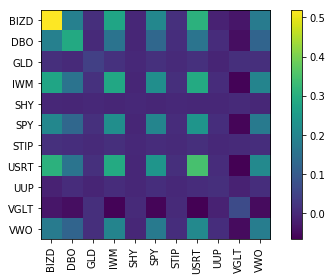

In [46]:
plotting.plot_covariance(sample_cov);

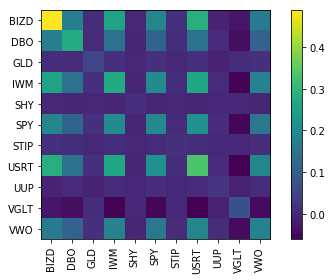

In [47]:
plotting.plot_covariance(sample_cov_alt);

In [48]:
# Calculate expected returns using CAPM
er_capm = expected_returns.capm_return(adj_close)
er_capm.sort_values(ascending=True, inplace=True)
er_capm

Symbols
BIZD   -0.171972
USRT   -0.155760
IWM    -0.142438
SPY    -0.111135
VWO    -0.100162
DBO    -0.097591
GLD     0.005242
STIP    0.011220
UUP     0.016706
SHY     0.021314
VGLT    0.047712
Name: mkt, dtype: float64

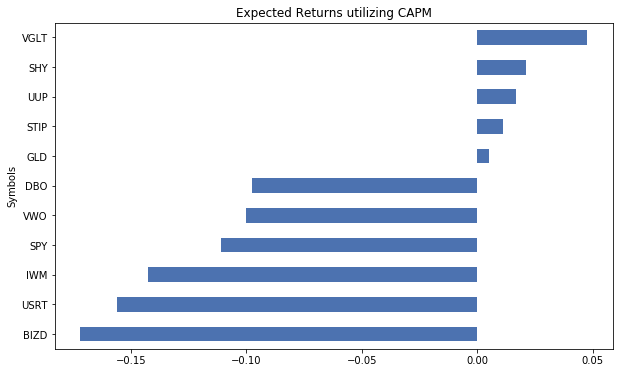

In [49]:
er_capm.plot.barh(title="Expected Returns utilizing CAPM",figsize=(10,6));

In [50]:
from pypfopt import EfficientFrontier

In [51]:
# Calculate portfolio weights with the objective of solving for max Sharpe ratio
ef_ft = EfficientFrontier(er_capm, sample_cov_alt, weight_bounds=(None, None))
ef_ft.max_sharpe()
max_sharpe_weights = ef_ft.clean_weights()
max_sharpe_weights

OrderedDict([('BIZD', -0.22126),
             ('USRT', -0.21492),
             ('IWM', -0.98117),
             ('SPY', -0.67922),
             ('VWO', -1.0),
             ('DBO', -0.6706),
             ('GLD', 1.0),
             ('STIP', 0.90547),
             ('UUP', 1.0),
             ('SHY', 0.86169),
             ('VGLT', 1.0)])

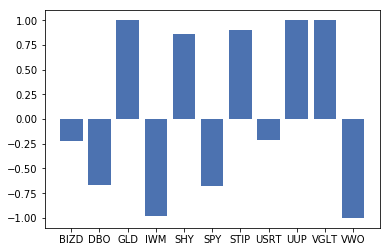

In [52]:
# Chart weightings w' max Sharpe Ratio objective
max_shp_wgt_lst = sorted(max_sharpe_weights.items())
x, y = zip(*max_shp_wgt_lst)
plt.bar(x, y,)
plt.show()

In [53]:
# Calculate portfolio weights with the objective of solving for min volatility
ef_ft_min_vol = EfficientFrontier(None, sample_cov_alt, weight_bounds=(None, None))
ef_ft_min_vol.min_volatility()
min_vol_weights = ef_ft.clean_weights()
min_vol_weights

C:\Users\erics\anaconda3\lib\site-packages\pypfopt\efficient_frontier.py:98: UserWarning: No expected returns provided. You may only use ef.min_volatility()
  "No expected returns provided. You may only use ef.min_volatility()"


OrderedDict([('BIZD', -0.22126),
             ('USRT', -0.21492),
             ('IWM', -0.98117),
             ('SPY', -0.67922),
             ('VWO', -1.0),
             ('DBO', -0.6706),
             ('GLD', 1.0),
             ('STIP', 0.90547),
             ('UUP', 1.0),
             ('SHY', 0.86169),
             ('VGLT', 1.0)])

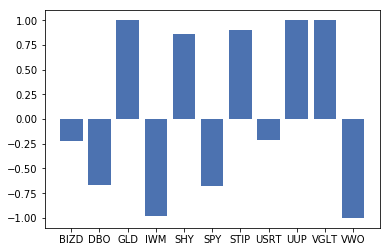

In [54]:
# Chart weightings w' minimum volatility objective
min_vol_wgt_lst = sorted(min_vol_weights.items())
x, y = zip(*min_vol_wgt_lst)
plt.bar(x, y,)
plt.show()